In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [2]:
df_merged = pd.DataFrame()
for file in sorted(glob.glob("validation/*jaccard.tsv")):
    sample = file.split("/")[-1].split(".")[0]
    print(sample)
    df = pd.read_csv(file, sep="\t")
    df["sample"] = sample
    df_merged = pd.concat([df_merged, df])

df_merged = df_merged.reset_index()

CNA_10xmultiome_1
CNA_10xmultiome_2
CNA_10xv11_1
CNA_10xv11_2
CNA_10xv11_3
CNA_10xv11_4
CNA_10xv11_5
CNA_10xv2_1
CNA_10xv2_2
SAN_10xmultiome_1
SAN_10xmultiome_2
STA_10xv11_1
STA_10xv11_2
TXG_10xv11_1
TXG_10xv2_1
TXG_10xv2_2
VIB_10xmultiome_1
VIB_10xmultiome_2
VIB_10xv1_1
VIB_10xv1_2
VIB_10xv2_1
VIB_10xv2_2


In [3]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

<AxesSubplot: xlabel='sample', ylabel='jaccard'>

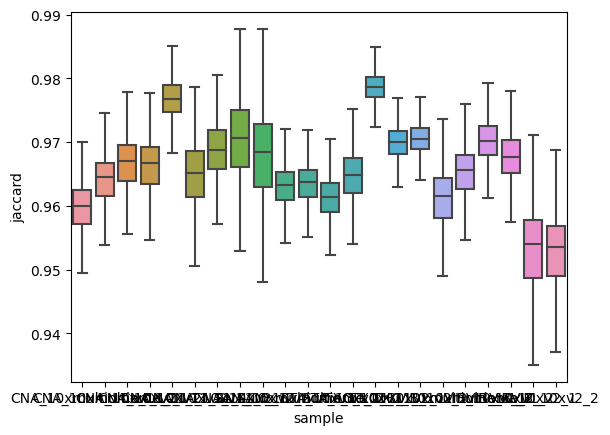

In [4]:
sns.boxplot(df_merged, x="sample", y="jaccard", showfliers=False)

In [31]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
]

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}
var_alias_dict = {"jaccard": "Jaccard index"}

In [32]:
metadata_bc_df_filtered_merged = df_merged

In [33]:
order_dict = {}
for tech in metadata_bc_df_filtered_merged["tech"].unique():
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]
    order_dict[tech] = df_tmp["sample"].unique()

In [34]:
variables_list

['jaccard']

In [35]:
n_samples

22

In [36]:
sorted(df_merged["sample"].unique())

['CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2']

In [51]:
sns.set_context("notebook")
sns.set_style("darkgrid")

10xv1
jaccard
0 2
10xv11
jaccard
2 10
10xv2
jaccard
10 16
10xmultiome
jaccard
16 22


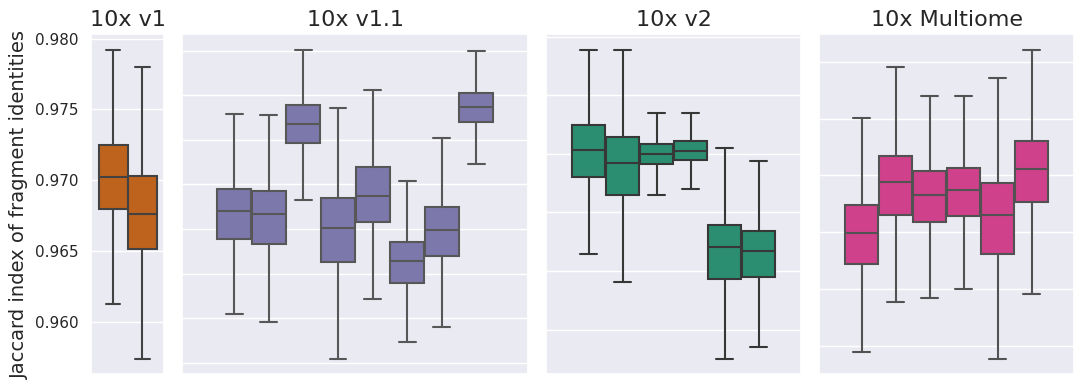

In [53]:
variables_list = ["jaccard"]

n_samples = len(df_merged["sample"].unique())
n_var = 1
individual_plot_row_height = 4
individual_barplot_width = 0.5
# initialize gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(
    figsize=(individual_barplot_width * n_samples, individual_plot_row_height * n_var),
)
gs = GridSpec(len(variables_list), n_samples, figure=fig)
grid_start = 0

for tech in tech_order:
    print(tech)
    # subset df to tech
    df_tmp = metadata_bc_df_filtered_merged[
        metadata_bc_df_filtered_merged["tech"] == tech
    ]

    # set quick palette
    color = tech_color_palette[tech]
    palette_tmp = {x: color for x in metadata_bc_df_filtered_merged["sample"].unique()}

    n_samples_in_tech = len(df_tmp["sample"].unique())
    grid_end = grid_start + n_samples_in_tech
    for variable in variables_list:
        print(variable)
        print(grid_start, grid_end)
        # now determine correct location on gridspec
        ax = fig.add_subplot(gs[variables_list.index(variable), grid_start:grid_end])

        sns.boxplot(
            data=df_tmp,
            x="tech",
            y=variable,
            hue="sample",
            hue_order=order_dict[tech],
            palette=palette_tmp,
            ax=ax,
            showfliers=False,
        )

        ax.get_legend().remove()

        # only set title on top row
        if variable == variables_list[0]:
            ax.set_title(tech_alias_dict[tech], fontsize=16)  # , fontweight="bold")
        else:
            ax.set_title(None)

        # only set y label on left col
        if tech == tech_order[0]:
            ax.set_ylabel(
                "Jaccard index of fragment identities", fontsize=14
            )  # , fontweight="bold")
        else:
            ax.set_ylabel(None)
            ax.set_yticklabels([])

        ax.set(xlabel="")
        ax.set_xticklabels([])

    # start coordinate of next tech is end coordinate of previous tech
    grid_start = grid_end


# plt.rcParams["font.weight"] = "bold"
plt.tight_layout()
plt.savefig(f"plots/full_jaccard_boxplot_vsn.png", dpi=600, facecolor="white")
plt.savefig(f"plots/full_jaccard_boxplot_vsn.svg", dpi=600, facecolor="white")
# plt.savefig(f"plts_scrap/fixedcells__boxplots_{y_var}.svg", dpi=900)

plt.show()